In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
max_features = 10000
maxlen = 500
batch_size = 32

In [22]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data( num_words=max_features)
#(input_train, y_train), (input_test, y_test) = imdb.load_data()
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [10]:
model = Sequential()
model.add(Embedding(max_features, 32)) #max_feature=10,000 so, 320,000
model.add(SimpleRNN(32))               #(32+32+1)*32=2080
model.add(Dense(1, activation='sigmoid'))#(32+1)*1=33
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10, batch_size=128, validation_split=0.2)

C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.5955 - acc: 0.6679 - val_loss: 0.5106 - val_acc: 0.7566
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.3544 - acc: 0.8530 - val_loss: 0.4272 - val_acc: 0.8158
Epoch 3/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2823 - acc: 0.8870 - val_loss: 0.3698 - val_acc: 0.8652
Epoch 4/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2192 - acc: 0.9174 - val_loss: 0.4816 - val_acc: 0.7870
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1675 - acc: 0.9376 - val_loss: 0.4021 - val_acc: 0.8440
Epoch 6/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1261 - acc: 0.9570 - val_loss: 0.4502 - val_acc: 0.8312
Epoch 7/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.0758 - acc: 0.9740 - val_loss: 0.4815 - val_acc:

In [12]:
predicted_classes = model.predict(input_test)

In [14]:
import numpy as np
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [15]:
predicted_classes.shape, y_test.shape

((25000,), (25000,))

In [17]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))


Found 12500 correct labels


In [18]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 12500 incorrect labels


In [19]:
from sklearn.metrics import classification_report
num_classes=2
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67     12500
     Class 1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


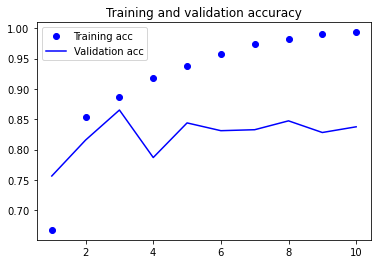

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


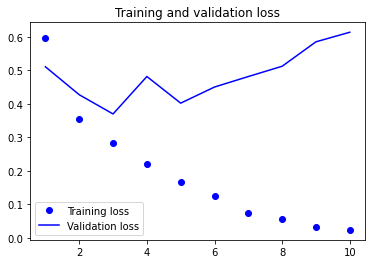

In [21]:

plt.figure()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()